About Dataset
Context
The dataset consists of lists of unique objects of popular portals for the sale of real estate in Russia. More than 540 thousand objects.
The dataset contains 540000 real estate objects in Russia.

Content
The Russian real estate market has a relatively short history. In the Soviet era, all properties were state-owned; people only had the right to use them with apartments allocated based on one's place of work. As a result, options for moving were fairly limited. However, after the fall of the Soviet Union, the Russian real estate market emerged and Muscovites could privatize and subsequently sell and buy properties for the first time. Today, Russian real estate is booming. It offers many exciting opportunities and high returns for lifestyle and investment.
The real estate market has been in a growth phase for several years, which means that you can still find properties at very attractive prices, but with good chances of increasing their value in the future.

Dataset
The dataset has 13 fields.

date - date of publication of the announcement;
time - the time when the ad was published;
geo_lat - Latitude
geo_lon - Longitude
region - Region of Russia. There are 85 subjects in the country in total.
building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;
level - Apartment floor
levels - Number of storeys
rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
area - the total area of ​​the apartment
kitchen_area - Kitchen area
price - Price. in rubles
Attention.
The dataset may contain erroneous data due to input errors on services, as well as outliers, and so on.

:)
Using this dataset, we offer Kagglers algorithms that use a wide range of functions to predict real estate prices. Competitors will rely on a vast dataset that includes housing data and macroeconomic models. An accurate forecasting model provides more confidence to its clients in a volatile economy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
raw_data = pd.read_csv('all_v2.csv')
data = raw_data.copy()
data

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


## DATA PROCESSING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [4]:
data.isnull().any()

price            False
date             False
time             False
geo_lat          False
geo_lon          False
region           False
building_type    False
level            False
levels           False
rooms            False
area             False
kitchen_area     False
object_type      False
dtype: bool

In [5]:
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
## el dataset dice que hay 85 tipos de regiones
print(data['region'].unique())
print(data['region'].value_counts().count())

[ 2661    81  2871  2843     3  3106  2922  2900  2722  6171  3230  4417
  5282  5368  3446  5520  6817  9579  2604  1010  9648  7793 13919  2860
  3019  4982  5241  3870  3991  2359  9654  2072  8090  4007 11171 10160
  7873  2594  8509 11416 11991  2880  5178 13913  6309  5952  6543  2328
  5993  2484 13098  4240  5789  1901 14880 10201  1491  2885  5794  2528
  4374  4695  5143  6937  2806 14368  5736  7121  4086   821 10582  7896
  8640  5703  8894  4249  3153  4189  2814  7929 16705    69  4963 61888]
84


In [8]:
region = data['region'].unique()
region

array([ 2661,    81,  2871,  2843,     3,  3106,  2922,  2900,  2722,
        6171,  3230,  4417,  5282,  5368,  3446,  5520,  6817,  9579,
        2604,  1010,  9648,  7793, 13919,  2860,  3019,  4982,  5241,
        3870,  3991,  2359,  9654,  2072,  8090,  4007, 11171, 10160,
        7873,  2594,  8509, 11416, 11991,  2880,  5178, 13913,  6309,
        5952,  6543,  2328,  5993,  2484, 13098,  4240,  5789,  1901,
       14880, 10201,  1491,  2885,  5794,  2528,  4374,  4695,  5143,
        6937,  2806, 14368,  5736,  7121,  4086,   821, 10582,  7896,
        8640,  5703,  8894,  4249,  3153,  4189,  2814,  7929, 16705,
          69,  4963, 61888])

In [9]:
region_num, _  = pd.factorize(region, sort=True)
region_num

array([14,  2, 20, 18,  0, 26, 24, 23, 15, 54, 28, 38, 45, 46, 29, 47, 57,
       68, 13,  4, 69, 60, 79, 19, 25, 41, 44, 30, 31,  9, 70,  7, 64, 32,
       74, 71, 61, 12, 65, 75, 76, 21, 43, 78, 55, 52, 56,  8, 53, 10, 77,
       35, 50,  6, 81, 72,  5, 22, 51, 11, 37, 39, 42, 58, 16, 80, 49, 59,
       33,  3, 73, 62, 66, 48, 67, 36, 27, 34, 17, 63, 82,  1, 40, 83])

In [10]:
data['region'], _ = pd.factorize(data['region'])
data['region'].unique()

/var/folders/xc/1xjfvgs97tv_p9tysdb73dhr0000gn/T/ipykernel_8241/1671363058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'], _ = pd.factorize(data['region'])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [11]:
data.head(5)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,3,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1


In [12]:
print(data['building_type'].unique())
print(data['building_type'].value_counts().count())

[1 3 4 2 5 0]
6


In [13]:
print(data['level'].unique())
print(data['level'].value_counts().count())

[ 8  5 12 13  4  1  2  9 10 25  7  6 16 17 14 11  3 18 15 23 21 20 22 19
 28 24 26 32 30 27 31 29 34 33 35 37 36 39 38]
39


In [14]:
print(data['levels'].unique())
print(data['levels'].value_counts().count())

[10 24  9 16 14  5 25 15 17  8  2  3 18  4 22 12 20  7 19  6 23 27  1 21
 11 28 13 36 26 33 34 30 29 35 32 31 37 38 39]
39


In [15]:
#tenemos que normalizar este valor
print(data['object_type'].unique())
print(data['object_type'].value_counts().count())
data['object_type'] = data['object_type'].map({1:1, 11:0})
data

[ 1 11]
2


/var/folders/xc/1xjfvgs97tv_p9tysdb73dhr0000gn/T/ipykernel_8241/3731005591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['object_type'] = data['object_type'].map({1:1, 11:0})


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,3,4,12,16,2,38.0,5.0,0
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,4,1,8,17,4,93.2,13.8,0
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,4,2,17,32,2,45.9,6.6,0
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,4,1,8,33,2,52.1,18.9,0


In [16]:
#algunos valores son negativos, hay que eliminarlos
print(data['rooms'].unique())
print(data['rooms'].value_counts().count())

[ 3  2  1  4 -1  5  7  6  8  9 -2 10]
12


In [17]:
data = data[data['rooms'] > 0]

In [18]:
print(data['rooms'].unique())

[ 3  2  1  4  5  7  6  8  9 10]


In [19]:
#Elimino la columna "time" porque no tiene uso

data = data.drop(['time'], axis=1)
data.head(5)

,price,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,44.996132,39.074783,3,4,12,16,2,38.0,5.0,0
4,5450000,2018-03-01,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1


In [20]:
#por ultimo cambio el formato de la columna date
data_test = data.copy()
data_test['date'] = pd.to_datetime(data_test['date'],format='%Y-%m-%d')

In [21]:
data_test['month'] = data_test['date'].dt.month

In [22]:
data_test['year'] = data_test['date'].dt.year

In [23]:
data_test.head(5)

,price,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,month,year
0,6050000,2018-02-19,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1,2,2018
1,8650000,2018-02-27,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1,2,2018
2,4000000,2018-02-28,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1,2,2018
3,1850000,2018-03-01,44.996132,39.074783,3,4,12,16,2,38.0,5.0,0,3,2018
4,5450000,2018-03-01,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1,3,2018


In [24]:
data_test = data_test.drop(['date'], axis=1)
data_test.head(5)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,month,year
0,6050000,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1,2,2018
1,8650000,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1,2,2018
2,4000000,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1,2,2018
3,1850000,44.996132,39.074783,3,4,12,16,2,38.0,5.0,0,3,2018
4,5450000,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1,3,2018


In [25]:
#POR ÚLTIMO ORDENO LAS COLUMNAS
data_test.columns

Index(['price', 'geo_lat', 'geo_lon', 'region', 'building_type', 'level',
       'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'month',
       'year'],
      dtype='object')

In [26]:
new_order = ['month','year','geo_lat', 'geo_lon', 'region', 'building_type', 'level',
             'levels', 'rooms', 'area', 'kitchen_area', 'object_type','price']
#data_test = data.reindex(columns=new_order)
#data_test.head(5)
#no lo hago porque me reordena las columnas pero me cambia el formato del mes y año

## EDA

In [27]:
#PRECIOS PROMEDIO POR AÑO
mean_price_per_year = data_test.groupby('year')['price'].mean()

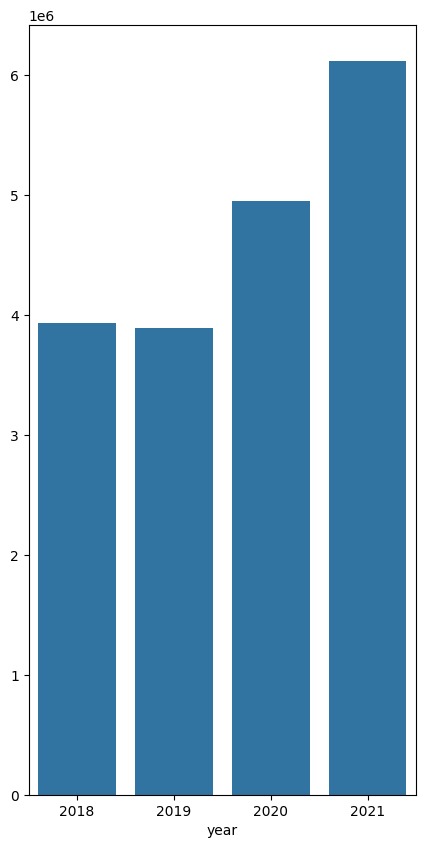

In [28]:
plt.figure(figsize=(5,10))
sns.barplot(x=mean_price_per_year.index, y=mean_price_per_year.values)
plt.show()

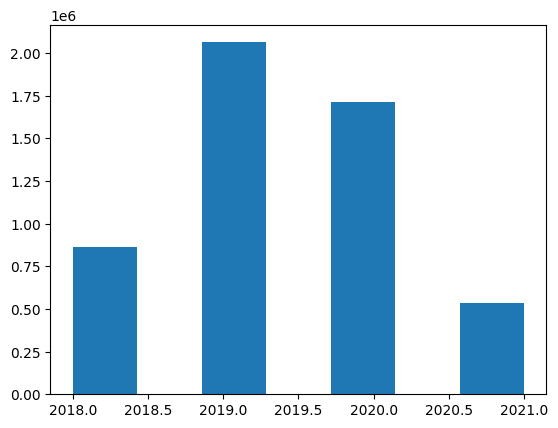

In [29]:
#CANTIDAD DE VIVIENDAS PUBLICADAS
plt.hist(data_test['year'], bins=7)
plt.show()

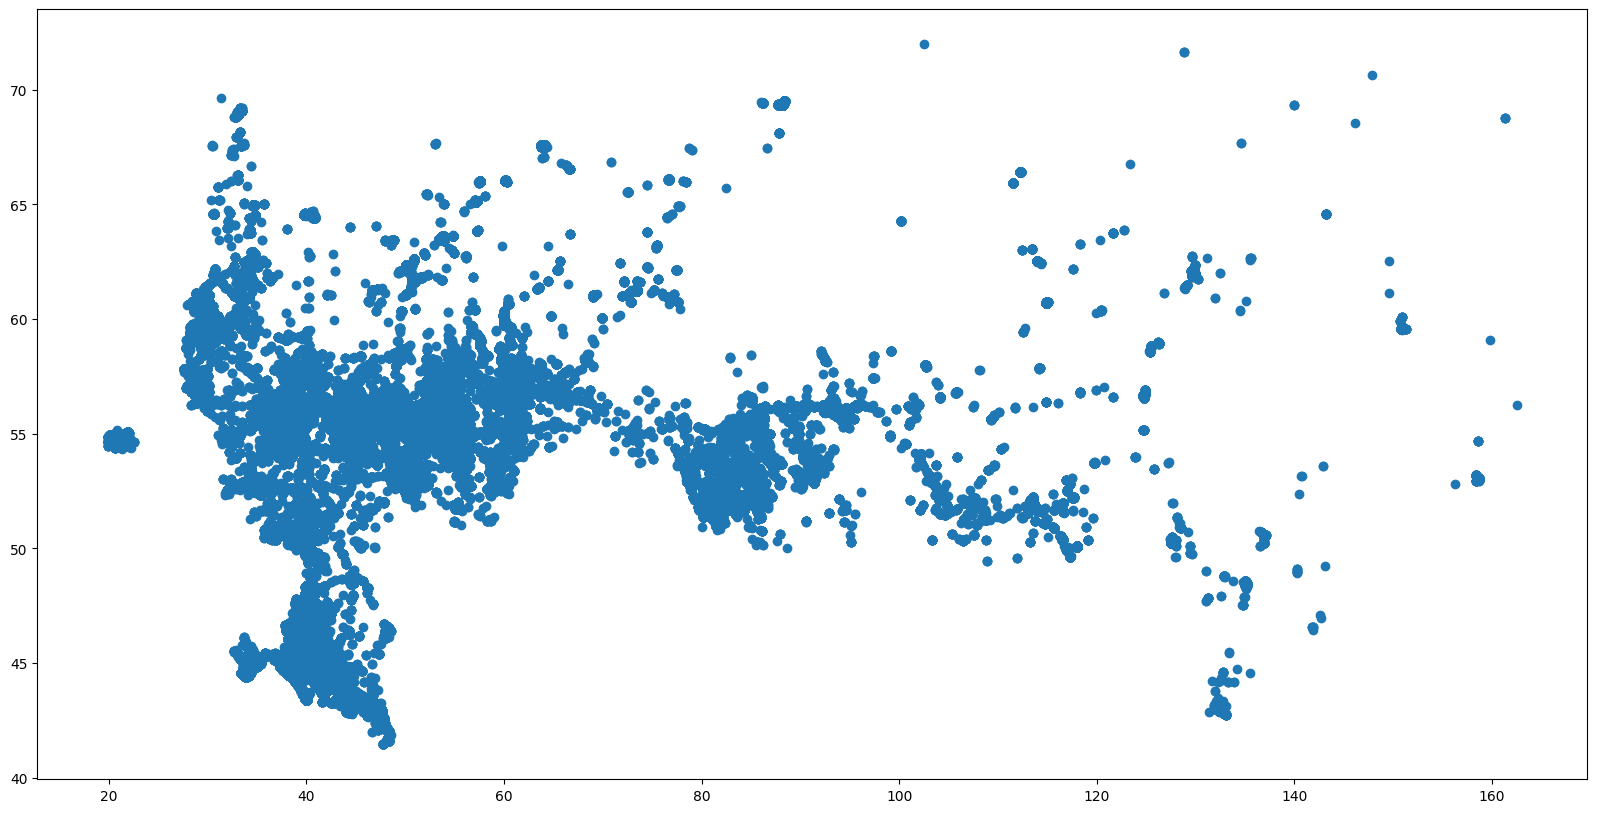

In [30]:
# GEOLOCALIZACION de las publicaciones
plt.figure(figsize=(20,10))
plt.scatter(data_test['geo_lon'],data_test['geo_lat'])
plt.show()

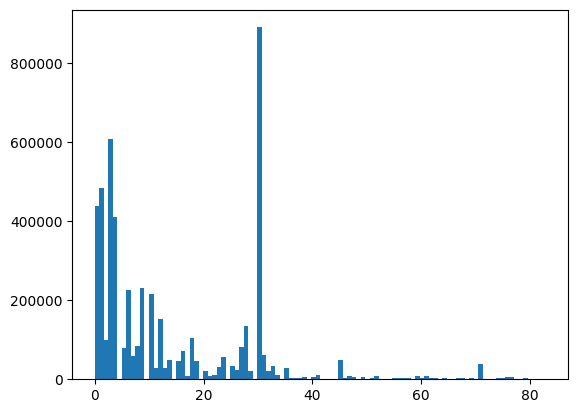

In [31]:
#REGION
plt.hist(data_test['region'], bins=100)
plt.show()

In [32]:
df_numeric = data_test.select_dtypes(include='number')
df_numeric

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,month,year
0,6050000,59.805808,30.376141,0,1,8,10,3,82.6,10.8,1,2,2018
1,8650000,55.683807,37.297405,1,3,5,24,2,69.1,12.0,1,2,2018
2,4000000,56.295250,44.061637,2,1,5,9,3,66.0,10.0,1,2,2018
3,1850000,44.996132,39.074783,3,4,12,16,2,38.0,5.0,0,3,2018
4,5450000,55.918767,37.984642,1,3,13,14,2,60.0,10.0,1,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,55.804736,37.750898,4,1,8,17,4,93.2,13.8,0,5,2021
5477002,12503160,55.841415,37.489624,4,2,17,32,2,45.9,6.6,0,5,2021
5477003,8800000,56.283909,44.075408,2,2,4,17,3,86.5,11.8,1,5,2021
5477004,11831910,55.804736,37.750898,4,1,8,33,2,52.1,18.9,0,5,2021


<Axes: >

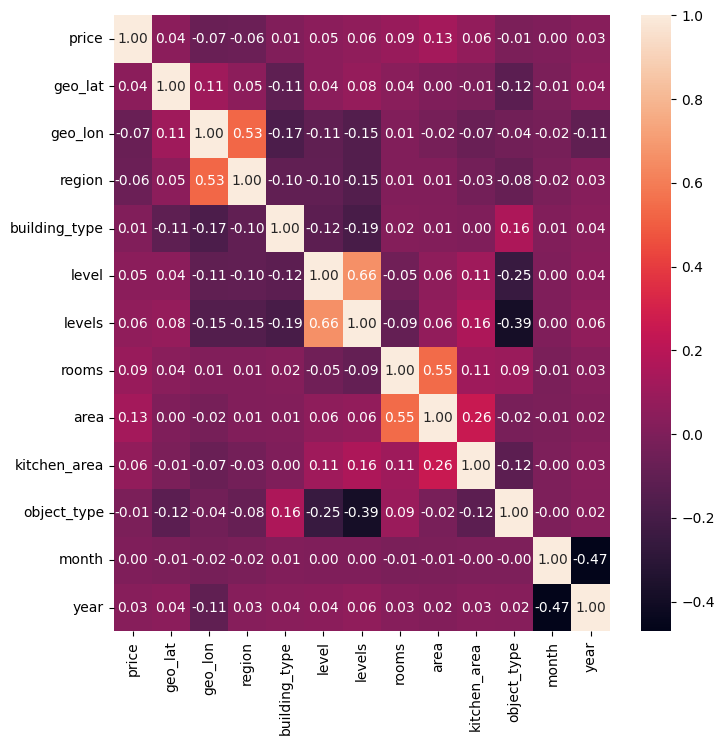

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df_numeric.corr(), fmt='.2f', annot=True)

In [34]:
data_test.duplicated().sum()

676879

In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169029 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   geo_lat        float64
 2   geo_lon        float64
 3   region         int64  
 4   building_type  int64  
 5   level          int64  
 6   levels         int64  
 7   rooms          int64  
 8   area           float64
 9   kitchen_area   float64
 10  object_type    int64  
 11  month          int64  
 12  year           int64  
dtypes: float64(4), int64(9)
memory usage: 552.1 MB


## ESTANDARIZACIÓN Y CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
X = data_test.drop(['price'], axis=1)
Y = data_test['price']

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
xTrain, xValid, yTrain, yValid = train_test_split(X_scaled, Y, train_size=0.8, test_size=0.2, random_state=42)

## CREACIÓN DEL MODELO

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [41]:
model_LR = LinearRegression()
model_LR.fit(xTrain, yTrain)
yPred_LR = model_LR.predict(xValid)
print('Mean Absolute Error:', mean_absolute_error(yValid,yPred_LR))
print('Mean Squared Error:', mean_squared_error(yValid,yPred_LR))
print('R2 Score:', r2_score(yValid,yPred_LR))

Mean Absolute Error: 2379851.735898267
Mean Squared Error: 431673387263040.9
R2 Score: 0.0264333477128893


In [ ]:
model_SVR = svm.SVR()
model_SVR.fit(xTrain, yTrain)
yPred_SVR = model_SVR.predict(xValid)
print('Mean Absolute Error:', mean_absolute_error(yValid,yPred_SVR))
print('Mean Squared Error:', mean_squared_error(yValid,yPred_SVR))
print('R2 Score:', r2_score(yValid,yPred_SVR))

In [42]:
model_RFR = RandomForestRegressor()
model_RFR.fit(xTrain, yTrain)
yPred_RFR = model_RFR.predict(xValid)
print('Mean Absolute Error:', mean_absolute_error(yValid,yPred_RFR))
print('Mean Squared Error:', mean_squared_error(yValid,yPred_RFR))
print('R2 Score:', r2_score(yValid,yPred_RFR))

Mean Absolute Error: 610873.0714953869
Mean Squared Error: 131749973776635.55
R2 Score: 0.7028601143983106


In [44]:
# Establecer un umbral de error
umbral_error = 1.0  # Puedes ajustar este valor según tus necesidades

# Calcular el MAE
mae = mean_absolute_error(yValid, yPred_RFR)

# Contar cuántas predicciones están dentro del umbral
predicciones_acertadas = np.sum(np.abs(yValid - yPred_RFR) <= umbral_error)

# Imprimir el resultado
print('Mean Absolute Error:', mae)
print('Número de predicciones acertadas dentro del umbral:', predicciones_acertadas)P

Mean Absolute Error: 610873.0714953869
Número de predicciones acertadas dentro del umbral: 77850


In [46]:
yPred_RFR.shape

(1033806,)